In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

sns.set_style('whitegrid')

In [55]:
df = pd.read_excel(r'C:\Users\jfrank\OneDrive - Specialized Bicycle Components\Win Tunnel Stuffs\210721_Tailwind Bag Benchmarking\210721_Tailwind Bag Benchmarking.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ForceAxial                      36 non-null     float64
 1   ForceSide                       36 non-null     float64
 2   Torque                          36 non-null     float64
 3   DynamicPressure                 36 non-null     float64
 4   RelativeHumidity                36 non-null     float64
 5   Temperature                     36 non-null     float64
 6   BarometricPressure              36 non-null     float64
 7   BodyDrag                        36 non-null     float64
 8   BodySide                        36 non-null     float64
 9   AirDensity                      36 non-null     float64
 10  AirSpeed                        36 non-null     float64
 11  BodyQ                           36 non-null     float64
 12  BodyCdA                         36 non

ForceAxial   ForceSide    Torque  DynamicPressure  RelativeHumidity  \
0  1923.437701 -224.419123  0.080332        46.199177         37.520303   
1  1914.862161 -217.629888  0.114235        45.865995         37.484158   
2  1925.691158 -228.460192  0.112958        46.245548         37.512630   
3  1305.516660 -140.688511  0.111339        28.442284         37.480111   
4  1918.606058 -228.181564  0.103865        45.873680         37.541634   

   Temperature  BarometricPressure     BodyDrag    BodySide  AirDensity  ...  \
0    25.861150        99514.578271  1923.437701  224.419123    1.154351  ...   
1    25.771990        99498.180682  1914.862161  217.629888    1.154530  ...   
2    25.841803        99510.473001  1925.691158  228.460192    1.154383  ...   
3    25.701365        99479.793739  1305.516660  140.688511    1.154605  ...   
4    25.776424        99503.202810  1918.606058  228.181564    1.154563  ...   

   pressure_voltage  force1_zero_voltage  force2_zero_voltage  \
0          7.004165             -0.13179             0.221398   
1          6.999480             -0.13179             0.221398   
2          7.002992             -0.13179             0.221398   
3          6.994227             -0.13179             0.221398   
4          7.000915             -0.13179             0.221398   

   force3_zero_voltage  pitot_zero_voltage  relative_humidity_zero_voltage  \
0             0.296948            0.023321                               0   
1             0.296948            0.023321                               0   
2             0.296948            0.023321                               0   
3             0.296948            0.023321                               0   
4             0.296948            0.023321                               0   

   temperature_zero_voltage  pressure_zero_voltage  image_index     title  
0                         0                      0            1  baseline  
1                         0                      0            2  baseline  
2                         0                      0            3  baseline  
3                         0                      0            4  baseline  
4                         0                      0            5  baseline  

[5 rows x 30 columns]

In [192]:
avg = df[df.title.str.contains('base', case = False)]
avg['AirSpeed']=avg['AirSpeed'].apply(np.floor)
avg_g = pd.DataFrame(avg.groupby(['AirSpeed']).mean())
avg_g['title'] = 'baseline average'
avg_g.reset_index(level = 0,inplace=True)
avg_g['AirSpeed']

C:\Users\jfrank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    25.0
1    32.0
2    45.0
Name: AirSpeed, dtype: float64

In [132]:
df['AirSpeed']=df['AirSpeed'].apply(np.floor)


In [85]:
data = pd.DataFrame(df.groupby(['title','AirSpeed'])['BodyCdA'].mean().unstack())
data.round(3)

AirSpeed                25.0   32.0   45.0
title                                     
Ortlieb Double         0.484  0.445  0.411
Ortlieb Rear Left      0.473  0.429  0.399
Ortlieb Rear Right     0.466  0.428  0.393
Tailwind Double        0.448  0.415  0.387
Tailwind Rear Left     0.443  0.409  0.382
Tailwind Rear Right    0.447  0.412  0.381
Thule Double           0.465  0.427  0.396
Thule Rear Left        0.453  0.414  0.389
Thule Rear Right       0.459  0.415  0.390
baseline               0.451  0.409  0.379
baseline (end of day)  0.439  0.404  0.376

In [78]:
baseline = pd.DataFrame(data.loc['baseline'],data.loc['baseline (end of day)'])
baseline

baseline
baseline (end of day)          
0.439428                    NaN
0.403778                    NaN
0.376482                    NaN

In [82]:
baseline = data.tail(2)
baseline

avg_baseline = baseline.mean()
avg_baseline 

new_row = pd.Series(data = {'title':'Avg_baseline','25.0':0.445,'32.0':0.407,'45.0':0.378},name = 'x')

In [103]:
ag_base = (data.loc['baseline']+data.loc['baseline (end of day)'])/2
data.loc['avg_baseline'] =  ag_base

In [104]:
data.round(3)

AirSpeed                25.0   32.0   45.0
title                                     
Ortlieb Double         0.484  0.445  0.411
Ortlieb Rear Left      0.473  0.429  0.399
Ortlieb Rear Right     0.466  0.428  0.393
Tailwind Double        0.448  0.415  0.387
Tailwind Rear Left     0.443  0.409  0.382
Tailwind Rear Right    0.447  0.412  0.381
Thule Double           0.465  0.427  0.396
Thule Rear Left        0.453  0.414  0.389
Thule Rear Right       0.459  0.415  0.390
baseline               0.451  0.409  0.379
baseline (end of day)  0.439  0.404  0.376
avg_baseline           0.445  0.407  0.378

In [107]:
left = data[data.index.str.contains('Left',case = False)]
left.loc['avg_baseline'] = ag_base
left.round(3)

C:\Users\jfrank\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


AirSpeed             25.0   32.0   45.0
title                                  
Ortlieb Rear Left   0.473  0.429  0.399
Tailwind Rear Left  0.443  0.409  0.382
Thule Rear Left     0.453  0.414  0.389
avg_baseline        0.445  0.407  0.378

In [109]:
right = data[data.index.str.contains('Right',case = False)]
right.loc['avg_baseline'] = ag_base
right.round(3)

AirSpeed              25.0   32.0   45.0
title                                   
Ortlieb Rear Right   0.466  0.428  0.393
Tailwind Rear Right  0.447  0.412  0.381
Thule Rear Right     0.459  0.415  0.390
avg_baseline         0.445  0.407  0.378

In [112]:
double = data[data.index.str.contains('Double',case = False)]
double.loc['avg_baseline'] = ag_base
double.round(3)

AirSpeed          25.0   32.0   45.0
title                               
Ortlieb Double   0.484  0.445  0.411
Tailwind Double  0.448  0.415  0.387
Thule Double     0.465  0.427  0.396
avg_baseline     0.445  0.407  0.378

In [193]:
d_data = df[df.title.str.contains('Double',case = False)]
d_data = pd.concat([d_data,avg_g])
d_data

ForceAxial   ForceSide    Torque  DynamicPressure  RelativeHumidity  \
9   1412.131502 -112.082152  0.278475        28.640322         37.701560   
10  2097.355625 -184.914328  0.360216        46.219079         37.757063   
11  3785.994590 -318.269355  0.581186        90.287417         38.026668   
18  1366.128391 -136.825784  0.113272        28.819962         37.578328   
19  2019.664747 -190.244301  0.111433        46.440587         37.611749   
20  3635.593368 -436.473537  0.089620        90.096524         37.739089   
27  1325.294279 -154.142405 -0.009930        29.075540         36.888981   
28  1961.820020 -232.500543 -0.040396        46.348905         36.954985   
29  3547.959784 -454.403091 -0.198135        90.069815         37.071424   
0   1301.438879 -144.465923  0.060054        28.716124         37.141183   
1   1919.100596 -221.595268  0.075425        46.135428         37.364161   
2   3470.029859 -391.670394  0.035603        90.107131         37.343891   

    Temperature  BarometricPressure     BodyDrag    BodySide  AirDensity  ...  \
9     26.059689        99479.671655  1412.131502  112.082152    1.153110  ...   
10    26.077322        99490.038965  2097.355625  184.914328    1.153151  ...   
11    26.357835        99560.028465  3785.994590  318.269355    1.152784  ...   
18    26.256164        99452.427675  1366.128391  136.825784    1.152004  ...   
19    26.376261        99475.685386  2019.664747  190.244301    1.151779  ...   
20    26.584859        99529.626462  3635.593368  436.473537    1.151538  ...   
27    26.687815        99428.885239  1325.294279  154.142405    1.150054  ...   
28    26.828522        99456.435212  1961.820020  232.500543    1.149792  ...   
29    27.037934        99491.510349  3547.959784  454.403091    1.149331  ...   
0     26.292618        99459.770428  1301.438879  144.465923    1.151998  ...   
1     26.040665        99495.189176  1919.100596  221.595268    1.153412  ...   
2     26.606933        99529.126585  3470.029859  391.670394    1.151497  ...   

    pressure_voltage  force1_zero_voltage  force2_zero_voltage  \
9           6.994192             -0.13179             0.221398   
10          6.997154             -0.13179             0.221398   
11          7.017151             -0.13179             0.221398   
18          6.986408             -0.13179             0.221398   
19          6.993053             -0.13179             0.221398   
20          7.008465             -0.13179             0.221398   
27          6.979681             -0.13179             0.221398   
28          6.987553             -0.13179             0.221398   
29          6.997574             -0.13179             0.221398   
0           6.988506             -0.13179             0.221398   
1           6.998625             -0.13179             0.221398   
2           7.008322             -0.13179             0.221398   

    force3_zero_voltage  pitot_zero_voltage  relative_humidity_zero_voltage  \
9              0.296948            0.023321                             0.0   
10             0.296948            0.023321                             0.0   
11             0.296948            0.023321                             0.0   
18             0.296948            0.023321                             0.0   
19             0.296948            0.023321                             0.0   
20             0.296948            0.023321                             0.0   
27             0.296948            0.023321                             0.0   
28             0.296948            0.023321                             0.0   
29             0.296948            0.023321                             0.0   
0              0.296948            0.023321                             0.0   
1              0.296948            0.023321                             0.0   
2              0.296948            0.023321                             0.0   

    temperature_zero_voltage  pressure_zero_voltage  image_index  \
9      

C:\Users\jfrank\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


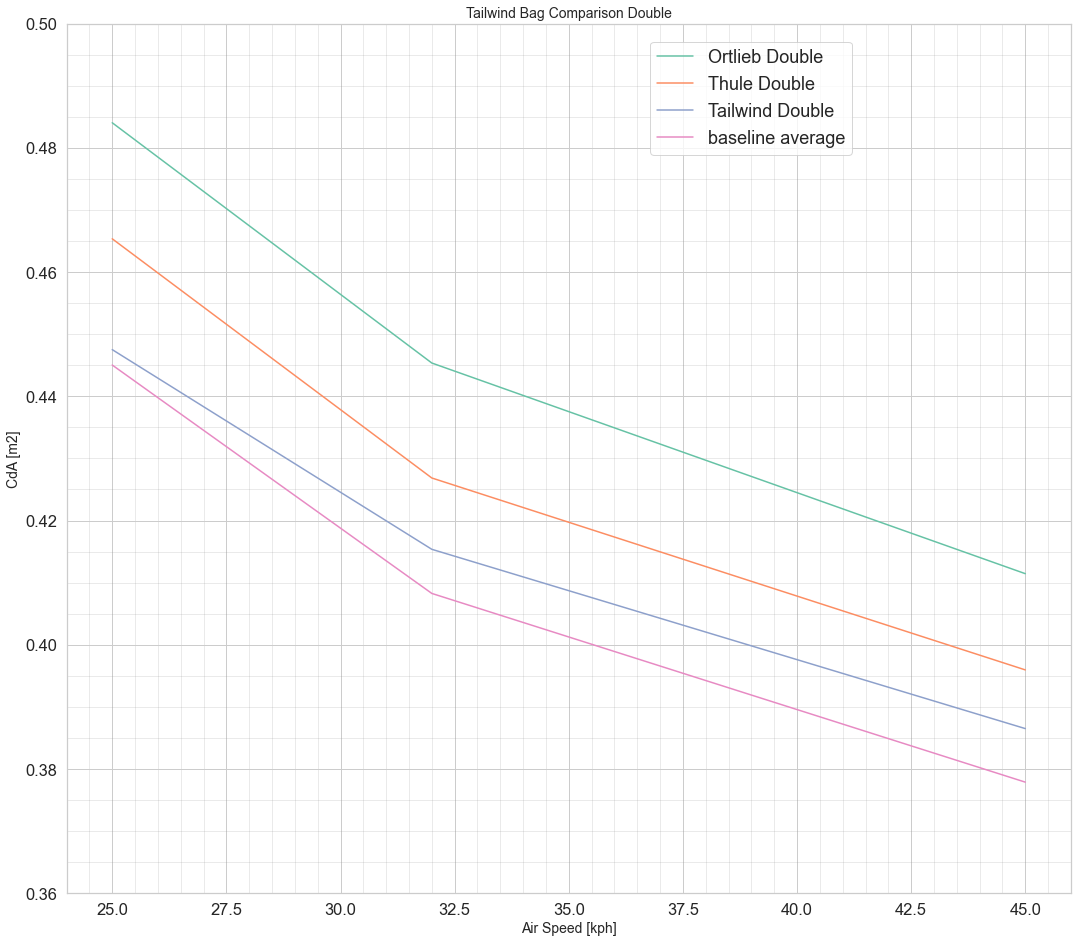

In [194]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (18, 16))

sns.lineplot('AirSpeed', 'BodyCdA', data = d_data,  
                                         alpha = 1.0, hue = 'title', palette = 'Set2')#,
                                         #markers = True, markersize=8, linewidth = 2)

ax.set_ylabel('CdA [m2]', fontsize =14)
ax.set_xlabel('Air Speed [kph]', fontsize =14)
ax.set_ylim([0.36, 0.50])
plt.title('Tailwind Bag Comparison Double', fontsize = 14)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.legend(bbox_to_anchor=(0.8, 1), loc=1, borderaxespad=1., fontsize =18)
plt.show()

In [195]:
left_data = df[df.title.str.contains('Left',case = False)]
left_data = pd.concat([left_data,avg_g])
left_data['BodyCdA']

12    0.473414
13    0.428509
14    0.399496
21    0.452501
22    0.414128
23    0.388727
30    0.443438
31    0.409394
32    0.381794
0     0.445032
1     0.408269
2     0.377891
Name: BodyCdA, dtype: float64

C:\Users\jfrank\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


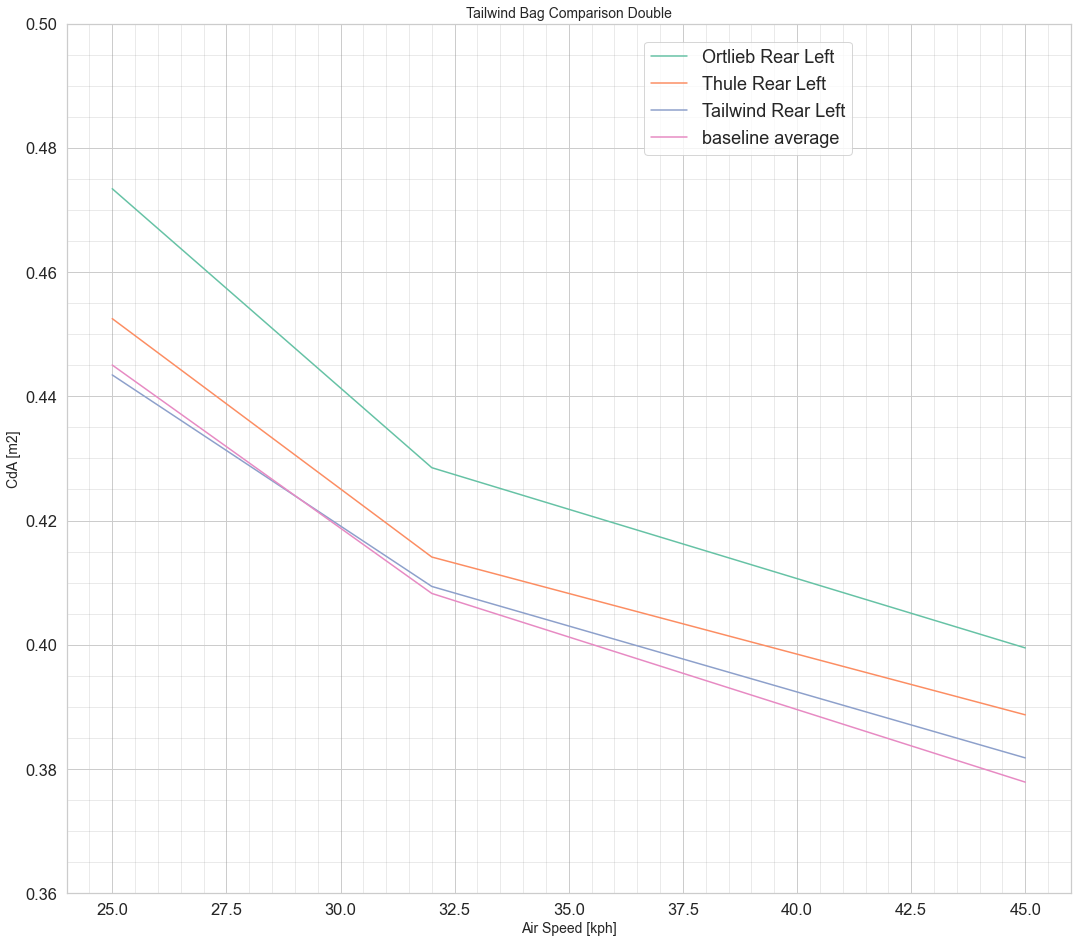

In [196]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (18, 16))

sns.lineplot('AirSpeed', 'BodyCdA', data = left_data,  
                                         alpha = 1.0, hue = 'title', palette = 'Set2')#,
                                         #markers = True, markersize=8, linewidth = 2)

ax.set_ylabel('CdA [m2]', fontsize =14)
ax.set_xlabel('Air Speed [kph]', fontsize =14)
ax.set_ylim([0.36, 0.50])
plt.title('Tailwind Bag Comparison Double', fontsize = 14)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.legend(bbox_to_anchor=(0.8, 1), loc=1, borderaxespad=1., fontsize =18)
plt.show()

In [197]:
right_data = df[df.title.str.contains('Right',case = False)]
right_data = pd.concat([right_data,avg_g])
right_data['BodyCdA']

6     0.465500
7     0.427847
8     0.392617
15    0.459078
16    0.414909
17    0.390031
24    0.446938
25    0.412137
26    0.381263
0     0.445032
1     0.408269
2     0.377891
Name: BodyCdA, dtype: float64

C:\Users\jfrank\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


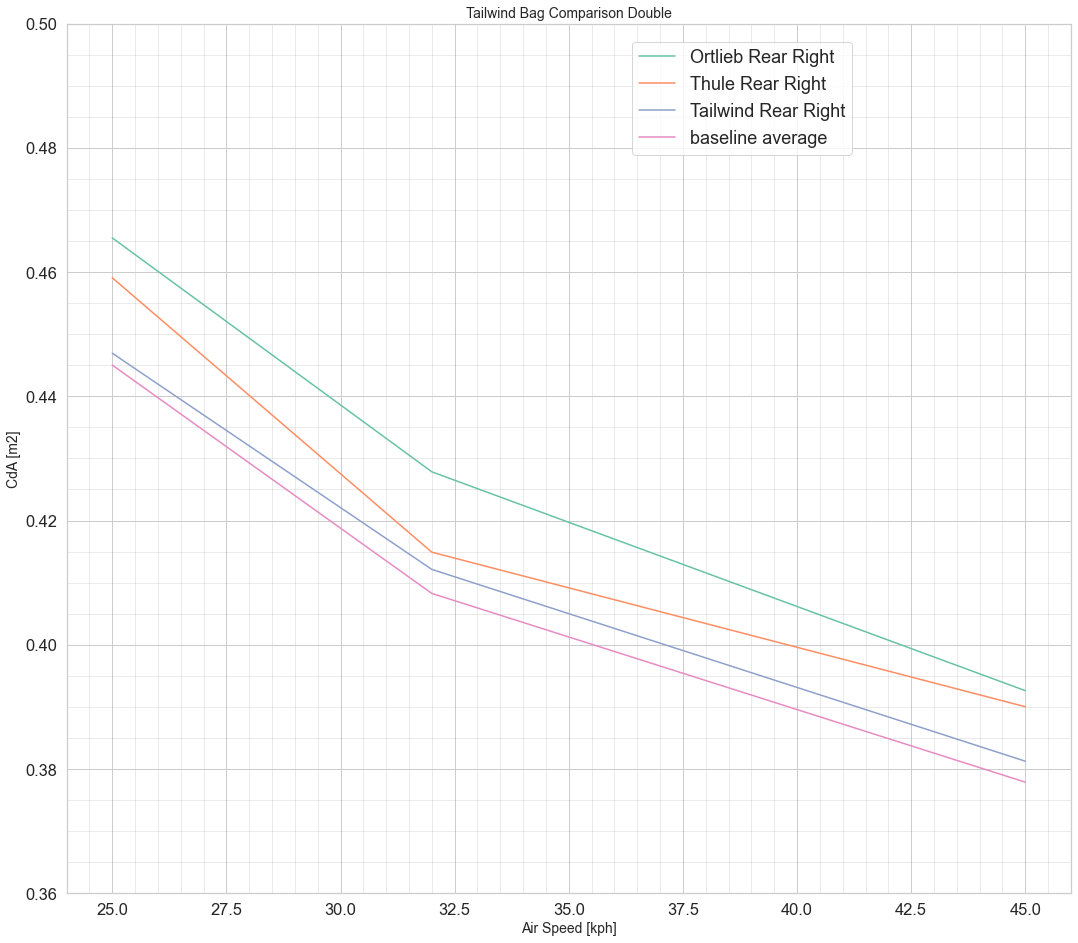

In [198]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (18, 16))

sns.lineplot('AirSpeed', 'BodyCdA', data = right_data,  
                                         alpha = 1.0, hue = 'title', palette = 'Set2')#,
                                         #markers = True, markersize=8, linewidth = 2)

ax.set_ylabel('CdA [m2]', fontsize =14)
ax.set_xlabel('Air Speed [kph]', fontsize =14)
ax.set_ylim([0.36, 0.50])
plt.title('Tailwind Bag Comparison Double', fontsize = 14)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.legend(bbox_to_anchor=(0.8, 1), loc=1, borderaxespad=1., fontsize =18)
plt.show()